In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib

import dash
import dash as dcc
import dash as html
from dash.dependencies import Input, Output, State
from dash import dash_table
import plotly.graph_objs as go
import dash_daq as daq

warnings.filterwarnings('ignore')


In [30]:
def show_uniques(dataframe):
    columns_not_showed = ['Idx', 'Satisfacao', 'UltimaAvaliacao', 'HorasMensais']
    columns = dataframe.columns
    for column in columns:
        if column not in columns_not_showed:
            print(f'{column} has {dataframe[column].unique()} values.')
            
def show_boxplots(dataframe):
    dataframe_to_boxplot = dataframe[['NumProjetos', 'TempoServico', 'Saiu']]
    fig = px.box(dataframe_to_boxplot, color = 'Saiu')
    fig.show()

In [2]:
dataframe = pd.read_csv("dadosRH.csv", encoding="latin2")
dataframe.head()

,Idx,NivelSalarial,AcidenteTrabalho,Saiu,Promovido5anos,Departamento,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
0,1,Baixo,0,1,0,sales,0.38,0.53,2,157,3
1,2,Médio,0,1,0,sales,0.80,0.86,5,262,6
2,3,Médio,0,1,0,sales,0.11,0.88,7,272,4
3,4,Baixo,0,1,0,sales,0.72,0.87,5,223,5
4,5,Baixo,0,1,0,sales,0.37,0.52,2,159,3


In [41]:
dataframe.describe()

,Idx,AcidenteTrabalho,Saiu,Promovido5anos,Satisfacao,UltimaAvaliacao,NumProjetos,HorasMensais,TempoServico
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.144610,0.238083,0.021268,0.612834,0.716102,3.803054,201.050337,3.498233
std,4329.982679,0.351719,0.425924,0.144281,0.248631,0.171169,1.232592,49.943099,1.460136
min,1.000000,0.000000,0.000000,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000
25%,3750.500000,0.000000,0.000000,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000
50%,7500.000000,0.000000,0.000000,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000
75%,11249.500000,0.000000,0.000000,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000
max,14999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000


In [14]:
dataframe.isnull().sum(axis = 0)

Idx                 0
NivelSalarial       0
AcidenteTrabalho    0
Saiu                0
Promovido5anos      0
Departamento        0
Satisfacao          0
UltimaAvaliacao     0
NumProjetos         0
HorasMensais        0
TempoServico        0
dtype: int64

In [15]:
show_uniques(dataframe)

NivelSalarial has ['Baixo' 'Médio' 'Alto'] values.
AcidenteTrabalho has [0 1] values.
Saiu has [1 0] values.
Promovido5anos has [0 1] values.
Departamento has ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] values.
NumProjetos has [2 5 7 6 4 3] values.
TempoServico has [ 3  6  4  5  2  8 10  7] values.


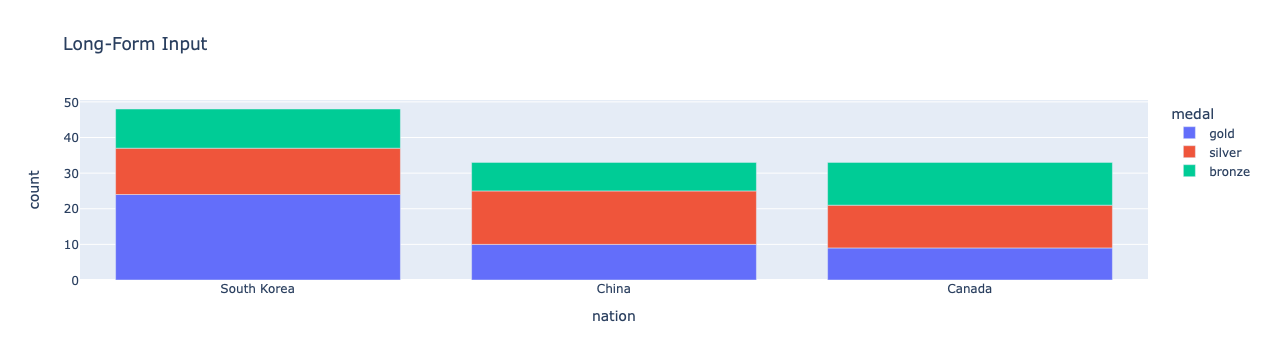

In [4]:
long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

# Gráficos a relacionar tudo com saiu
### barplot
    #### nível salario e dapartamento - one hot encode

# Dashboard Report

In [20]:
#start_dashboard()

In [ ]:
app = dash.Dash(
    __name__,
    meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}],
)
app.title = "Data Visualization Dashboard"
server = app.server
app.config["suppress_callback_exceptions"] = True

suffix_row = "_row"
suffix_button_id = "_button"
suffix_sparkline_graph = "_sparkline_graph"
suffix_count = "_count"
suffix_ooc_n = "_OOC_number"
suffix_ooc_g = "_OOC_graph"
suffix_indicator = "_indicator"

def build_banner():
    return html.Div(
        id="banner",
        className="banner",
        children=[
            html.Div(
                id="banner-text",
                children=[
                    html.H5("Data Visualization Dashboard"),
                    html.H6("Manage Reporting"),
                ],
            ),
            html.Div(
                id="banner-logo",
                children=[
                    html.Button(
                        id="learn-more-button", children="About Noix", n_clicks=0
                    ),
                    html.A(
                        html.Img(id="logo", src=app.get_asset_url("dash-logo-new.png")),
                        href="https://plotly.com/dash/",
                    ),
                ],
            ),
        ],
    )

def build_tabs():
    return html.Div(
        id="tabs",
        className="tabs",
        children=[
            dcc.Tabs(
                id="app-tabs",
                value="tab2",
                className="custom-tabs",
                children=[
                    dcc.Tab(
                        id="Specs-tab",
                        label="Operational",
                        value="tab1",
                        className="custom-tab",
                        selected_className="custom-tab--selected",
                    ),
                    dcc.Tab(
                        id="Control-chart-tab",
                        label="Management",
                        value="tab2",
                        className="custom-tab",
                        selected_className="custom-tab--selected",
                    ),
                ],
            )
        ],
    )


app.layout = html.Div(
    id="big-app-container",
    children=[
        build_banner(),
        html.Div(
            id="app-container",
            children=[
                build_tabs(),
                # Main app
                html.Div(id="app-content"),
            ],
        ),
    ],
)


# Start Server
if __name__ == "__main__":
    app.run_server(port = 9050)

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

Dash is running on http://127.0.0.1:9050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
